In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import tokenize
import nltk
from gensim.models import KeyedVectors
from string import punctuation
import unidecode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
colnames=['output','text']
df = pd.read_csv('all-data.csv', names=colnames, header=None)

First, we download our dataset. Data extracted from: https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news

In [4]:
df.head()

,output,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [5]:
list_output = df.output.unique()
list_output

array(['neutral', 'negative', 'positive'], dtype=object)

In [6]:
df.output.value_counts()

neutral     2879
positive    1363
negative     604
Name: output, dtype: int64

In [9]:
print('Percentage of outputs:')
print('neutral:',df.output.value_counts()['neutral']/df.output.count())
print('positive:',df.output.value_counts()['positive']/df.output.count())
print('negative:',df.output.value_counts()['negative']/df.output.count())

Percentage of outputs:
neutral: 0.594098225340487
positive: 0.28126289723483283
negative: 0.12463887742468015


As seen, there is an imbalance between all three outputs

In [27]:
all_sentences = [text for text in df.text]
words = ' '.join(all_sentences)

cloud_of_words = WordCloud().generate(words)

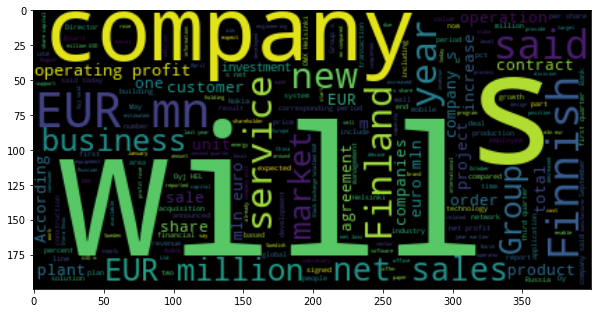

In [28]:
plt.figure(figsize=(10,8))
plt.imshow(cloud_of_words, interpolation='bilinear')
plt.show()

In [34]:
token_space = tokenize.WhitespaceTokenizer()
token_words = token_space.tokenize(words)
frequency = nltk.FreqDist(token_words)
frequency

FreqDist({'.': 4780, 'the': 4712, ',': 4662, 'of': 3202, 'in': 2752, 'and': 2584, 'to': 2496, 'a': 1631, 'The': 1354, 'for': 1129, ...})

In [44]:
stop_words = nltk.corpus.stopwords.words('english')
token_punct = tokenize.WordPunctTokenizer()
puncts = list()
for punct in punctuation:
    puncts.append(punct)
punct_and_stopwords = puncts + stop_words

Remove stopwords

In [49]:
sentences_after_stopwords = list()

for sentence in df.text:
    new_sentence = list()
    words_from_sentence = token_space.tokenize(sentence)
    for word in words_from_sentence:
        if word not in stop_words:
            new_sentence.append(word)
    sentences_after_stopwords.append(" ".join(new_sentence))

Remove puncts

In [81]:
sentences_after_stopwords_puncts = list()

for sentence in sentences_after_stopwords:
    new_sentence = list()
    words_from_sentence = token_punct.tokenize(sentence)
    for word in words_from_sentence:
        if word not in punct_and_stopwords:
            new_sentence.append(word)
    sentences_after_stopwords_puncts.append(" ".join(new_sentence))

In [83]:
words_with_no_accent = [unidecode.unidecode(text) for text in sentences_after_stopwords_puncts]
stop_words_no_accent = [unidecode.unidecode(text) for text in punct_and_stopwords]

sentences_after_stopwords_puncts_accents = list()

for sentence in words_with_no_accent:
    new_sentence = list()
    words_from_sentence = token_punct.tokenize(sentence)
    for word in words_from_sentence:
        if word not in stop_words_no_accent:
            new_sentence.append(word)
    sentences_after_stopwords_puncts_accents.append(" ".join(new_sentence))

In [85]:
sentences_after_stopwords_puncts_accents_lower = list()
for sentence in sentences_after_stopwords_puncts_accents:
    lower_sentence = sentence.lower()
    sentences_after_stopwords_puncts_accents_lower.append("".join(lower_sentence))

In [135]:
tfidf = TfidfVectorizer(lowercase=False,max_features=600)
vector_tfidf = tfidf.fit_transform(sentences_after_stopwords_puncts_accents_lower)

In [136]:
# pd.DataFrame(vector_tfidf.todense(),columns=tfidf.get_feature_names())

In [142]:
X_train,X_test,Y_train,Y_test = train_test_split(vector_tfidf,df.output,random_state = 100,test_size=0.1)
logistic_regression = LogisticRegression(solver = 'lbfgs')

In [143]:
logistic_regression.fit(X_train,Y_train)
logistic_regression.score(X_test,Y_test)

0.7319587628865979